## Importing Libraries|

In [1]:
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import random
random.seed(101)

## Loading Data

In [3]:
data = pd.read_csv('titanic_data.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dict_live = {
0: "Died",
1:"Survived"
}

dict_sex={
    'male':0,
    'female' :1
} 

data['Bsex'] = data['Sex'].apply(lambda x: dict_sex[x])

# features
features = data[ ['Pclass', 'Bsex']]

In [6]:
features

,Pclass,Bsex
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,1
889,1,0


In [7]:
# conerting features to numpy array for MultiLayerPerceptron
features = data[ ['Pclass', 'Bsex']].to_numpy()
labels = data['Survived'].to_numpy()

## Splitting the data

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.2, random_state =0)

## Multi-Layer Perceptron

**Activation Function and Derivation**

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x, derivative=False):
    if derivative:
        # f = sigmoid(x) * (1 - sigmoid(x))
        f = 1/(1+np.exp(-x))*(1-1/(1+np.exp(-x)))
    else:
        f = 1 / (1 + np.exp(-x))
    return f

def ReLU(x, derivative=False):
    if derivative:
        f = np.heaviside(x, 1)
    else:
        f = np.maximum(x, 0)
    return f

def train_ANN(xtrain, ytrain, h1_units=4, h2_units=4, learning_rate=0.0015):
    np.random.seed(101)
    
    # Hidden layer 1
    w1 = 2 * np.random.rand(h1_units, xtrain.shape[1])
    b1 = np.random.rand(h1_units)
    
    # Hidden layer 2
    w2 = 2 * np.random.rand(h2_units, h1_units)
    b2 = np.random.rand(h2_units)
    
    # Output layer (assuming one output unit)
    w_out = 2 * np.random.rand(1, h2_units)
    b_out = np.random.rand(1)
    
    loss = []
    vec_y = []  # Initialize vec_y
    
    for i in range(xtrain.shape[0]):
        x_data = xtrain[i]
        
        # Feed Forward
        h1 = ReLU(np.dot(w1, x_data) + b1)  # Hidden layer 1 output
        h2 = ReLU(np.dot(w2, h1) + b2)  # Hidden layer 2 output
        y = sigmoid(np.dot(w_out, h2) + b_out)  # Output of the output layer
        
        # Backpropagate - calculate the layer derivatives
        delta_out = (y - ytrain[i]) * sigmoid(y, derivative=True)
        delta_2 = np.dot(delta_out, w_out) * ReLU(h2, derivative=True)
        delta_1 = np.dot(delta_2, w2) * ReLU(h1, derivative=True)
        
        # Gradient descent
        w_out -= learning_rate * delta_out * h2  # Output layer
        b_out -= learning_rate * delta_out
        
        # Hidden layer 2
        w2 -= learning_rate * np.outer(delta_2, h1)
        b2 -= learning_rate * delta_2
        
        # Hidden layer 1
        w1 -= learning_rate * np.outer(delta_1, x_data)
        b1 -= learning_rate * delta_1
        
        # Cost
        loss.append((1/2) * np.sum((y - ytrain[i])**2))
        vec_y.append(y[0])
    
    # Compute batch loss
    batch_loss = []
    for i in range(10):
        loss_avg = 0
        for m in range(60):
            loss_avg += vec_y[60*i + m] / 60
        batch_loss.append(loss_avg)
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(batch_loss) + 1), batch_loss)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
    
    return w1, b1, w2, b2, w_out, b_out, loss


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

def sigmoid(x, derivative=False):
    f = 1 / (1 + np.exp(-x))
    if derivative:
        return f * (1 - f)
    return f

def ReLU(x, derivative=False):
    if derivative:
        return np.where(x > 0, 1, 0)
    return np.maximum(x, 0)

def binary_crossentropy(y_true, y_pred):
    epsilon = 1e-15  # Small constant to prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def train_ANN(xtrain, ytrain, h1_units=4, h2_units=4, learning_rate=0.001, epochs=1000, batch_size=32, dropout_rate=0.5):
    np.random.seed(101)
    
    # Normalize data
    scaler = StandardScaler()
    xtrain = scaler.fit_transform(xtrain)
    
    # Initialize weights and biases
    w1 = 2 * np.random.rand(xtrain.shape[1], h1_units) - 1
    b1 = np.random.rand(h1_units) - 0.5
    w2 = 2 * np.random.rand(h1_units, h2_units) - 1
    b2 = np.random.rand(h2_units) - 0.5
    w_out = 2 * np.random.rand(h2_units, 1) - 1
    b_out = np.random.rand(1) - 0.5
    
    loss = []
    
    for epoch in range(epochs):
        batch_loss = 0
        for start in range(0, xtrain.shape[0], batch_size):
            end = min(start + batch_size, xtrain.shape[0])
            x_batch = xtrain[start:end]
            y_batch = ytrain[start:end]
            
            # Feed Forward
            h1 = ReLU(np.dot(x_batch, w1) + b1)
            h1_dropout = np.where(np.random.rand(*h1.shape) < dropout_rate, 0, h1) / (1 - dropout_rate)  # Apply dropout
            h2 = ReLU(np.dot(h1_dropout, w2) + b2)
            h2_dropout = np.where(np.random.rand(*h2.shape) < dropout_rate, 0, h2) / (1 - dropout_rate)  # Apply dropout
            y_pred = sigmoid(np.dot(h2_dropout, w_out) + b_out)
            
            # Calculate Loss
            batch_loss += binary_crossentropy(y_batch.reshape(-1, 1), y_pred)
            
            # Backpropagation
            error = y_pred - y_batch.reshape(-1, 1)
            delta_out = error * sigmoid(np.dot(h2_dropout, w_out) + b_out, derivative=True)
            delta_2 = np.dot(delta_out, w_out.T) * ReLU(np.dot(h1_dropout, w2) + b2, derivative=True)
            delta_1 = np.dot(delta_2, w2.T) * ReLU(np.dot(x_batch, w1) + b1, derivative=True)
            
            # Gradient Descent
            w_out -= learning_rate * np.dot(h2_dropout.T, delta_out)
            b_out -= learning_rate * np.sum(delta_out, axis=0)
            w2 -= learning_rate * np.dot(h1_dropout.T, delta_2)
            b2 -= learning_rate * np.sum(delta_2, axis=0)
            w1 -= learning_rate * np.dot(x_batch.T, delta_1)
            b1 -= learning_rate * np.sum(delta_1, axis=0)
        
        # Average loss for the epoch
        loss.append(batch_loss / (xtrain.shape[0] / batch_size))
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {batch_loss / (xtrain.shape[0] / batch_size)}')
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(loss) + 1), loss)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
    
    return w1, b1, w2, b2, w_out, b_out, loss

def ANN_pred(xtest, w1, b1, w2, b2, w_out, b_out, dropout_rate=0.5):
    scaler = StandardScaler()
    xtest = scaler.fit_transform(xtest)
    
    pred = []
    for i in range(xtest.shape[0]):
        x = xtest[i]
        
        # Feed Forward
        h1 = ReLU(np.dot(x, w1) + b1)
        h1_dropout = np.where(np.random.rand(*h1.shape) < dropout_rate, 0, h1) / (1 - dropout_rate)
        h2 = ReLU(np.dot(h1_dropout, w2) + b2)
        h2_dropout = np.where(np.random.rand(*h2.shape) < dropout_rate, 0, h2) / (1 - dropout_rate)
        y = sigmoid(np.dot(h2_dropout, w_out) + b_out)
        
        # Use threshold of 0.5 for binary classification
        pred.append(1 if y >= 0.5 else 0)
    
    return np.array(pred)

def cross_validate(x, y, n_splits=5, **kwargs):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    accuracies = []
    fold = 1
    
    for train_index, val_index in kf.split(x):
        print(f'Fold {fold}')
        X_train, X_val = x[train_index], x[val_index]
        Y_train, Y_val = y[train_index], y[val_index]
        
        w1, b1, w2, b2, w_out, b_out, loss = train_ANN(X_train, Y_train, **kwargs)
        
        # Predict on validation set
        y_pred = ANN_pred(X_val, w1, b1, w2, b2, w_out, b_out)
        
        # Calculate accuracy
        accuracy = np.mean(y_pred == Y_val)
        accuracies.append(accuracy)
        
        print(f'Validation Accuracy: {accuracy * 100:.2f}%')
        fold += 1
    
    print(f'\nAverage Accuracy: {np.mean(accuracies) * 100:.2f}%')
    return np.mean(accuracies)

# Example usage
# Assuming xtrain and ytrain are your features and labels
# average_accuracy = cross_validate(xtrain, ytrain, h1_units=8, h2_units=8, learning_rate=0.001, epochs=1000, batch_size=32, dropout_rate=0.5)


In [10]:
xtrain.shape

(712, 2)

**Training Model**

Epoch 0, Loss: 0.8447136487285996
Epoch 100, Loss: 0.4968080538877179
Epoch 200, Loss: 0.47747121902109363
Epoch 300, Loss: 0.4747438484078869
Epoch 400, Loss: 0.4742346189784308
Epoch 500, Loss: 0.47401141578432243
Epoch 600, Loss: 0.4739506275741606
Epoch 700, Loss: 0.47388189008295123
Epoch 800, Loss: 0.4738590764122132
Epoch 900, Loss: 0.4738638587598554


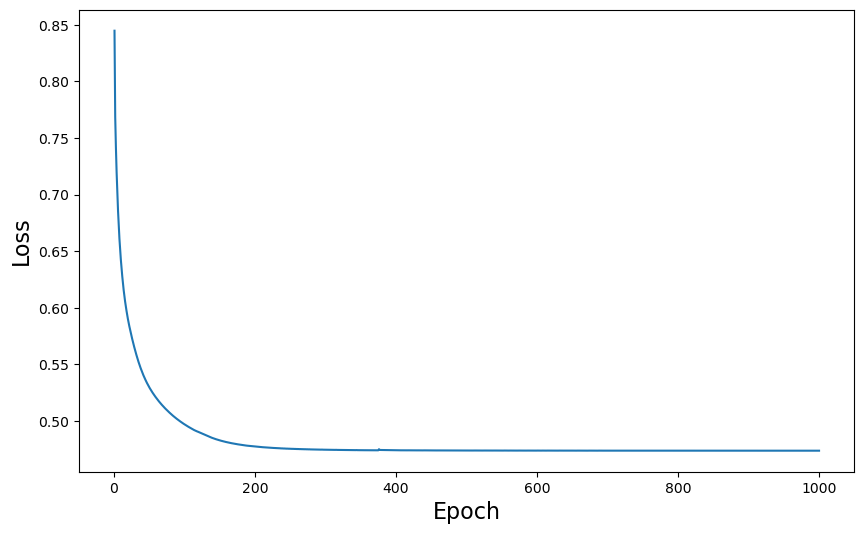

In [11]:
w1, b1, w2, b2, w_out, b_out, loss = train_ANN(xtrain, ytrain)

## Testing Module 

def ANN_pred(xtest, w1, b1, w2, b2, w_out, b_out):
    
    pred = []
    for i in range(0, xtest.shape[0]):
        x=xtest[i]
        
        # Feed Forward
        z1 = ReLU(np.dot(w1, x) + b1)  # Hidden layer 1 output
        z2 = ReLU(np.dot(w2, z1) + b2)  # Hidden layer 2 output
        y = sigmoid(np.dot(w_out, z2) + b_out)  # Output of the output layer
    
        pred.append(np.heaviside(y-0.5, 1)[0])
    
    return np.array(pred)
    
    
    

In [12]:
def ANN_pred(xtest, w1, b1, w2, b2, w_out, b_out):
    pred = []
    for i in range(xtest.shape[0]):
        x = xtest[i]
        
        # Feed Forward
        h1 = ReLU(np.dot(x, w1) + b1)  # Hidden layer 1 output
        h2 = ReLU(np.dot(h1, w2) + b2)  # Hidden layer 2 output
        y = sigmoid(np.dot(h2, w_out) + b_out)  # Output of the output layer
        
        # Use threshold of 0.5 for binary classification
        pred.append(1 if y >= 0.5 else 0)
    
    return np.array(pred)


In [13]:
predictions = ANN_pred(xtest, w1, b1, w2, b2, w_out, b_out)

In [14]:
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [15]:
ytest

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

## Model Evaluation

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(ytest, predictions)

df_cm = pd. DataFrame(cm, index = [dict_live[i] for i in range (0,2)],
                      columns = [dict_live[i] for i in range(0,2)])

In [17]:
cm

array([[92, 18],
       [20, 49]])

In [18]:
df_cm

,Died,Survived
Died,92,18
Survived,20,49


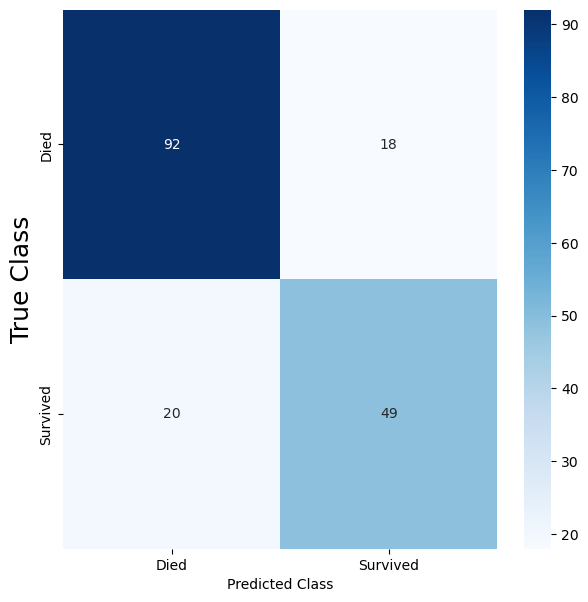

In [19]:
plt. figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True,
cmap=plt. cm.Blues, fmt='g')
plt. xlabel("Predicted Class")
plt. ylabel("True Class", fontsize=18)
plt. show()

In [20]:
accuracy_score(ytest, predictions)

0.7877094972067039